In [105]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [5, 3]
plt.rc('legend',fontsize=7)

In [76]:
# Problem: from permintaan and persediaan to produksi
x_permintaan = np.arange(0, 6000, 1.0)
x_persediaan = np.arange(0, 700, 1.0)
x_produksi = np.arange(0, 9000, 1.0)

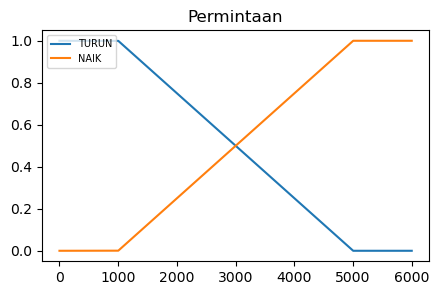

In [95]:
# Membership functions
permintaan_turun = fuzz.trapmf(x_permintaan, [0, 0, 1000, 5000])
permintaan_naik = fuzz.trapmf(x_permintaan, [1000, 5000, 6000, 6000])

plt.title("Permintaan")
plt.plot(x_permintaan, permintaan_turun, label="TURUN", marker="")
plt.plot(x_permintaan, permintaan_naik, label="NAIK", marker="")
plt.legend(loc="upper left")
plt.show()

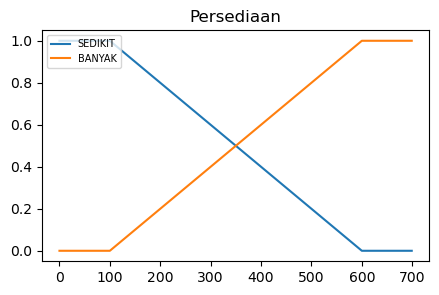

In [96]:
persediaan_sedikit = fuzz.trapmf(x_persediaan, [0, 0, 100, 600])
persediaan_banyak = fuzz.trapmf(x_persediaan, [100, 600, 700, 700])

plt.title("Persediaan")
plt.plot(x_persediaan, persediaan_sedikit, label="SEDIKIT", marker="")
plt.plot(x_persediaan, persediaan_banyak, label="BANYAK", marker="")
plt.legend(loc="upper left")
plt.show()

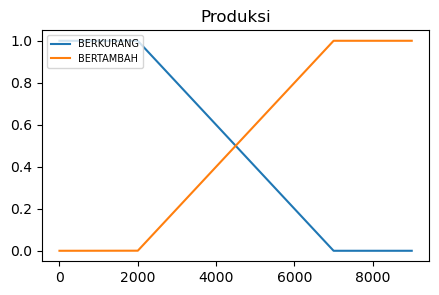

In [173]:
produksi_berkurang = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_bertambah = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])

plt.title("Produksi")
plt.plot(x_produksi, produksi_berkurang, label="BERKURANG", marker="")
plt.plot(x_produksi, produksi_bertambah, label="BERTAMBAH", marker="")
plt.legend(loc="upper left")
plt.show()

In [91]:
# Input: permintaan dan persediaan
permintaan = 4000
persediaan = 300

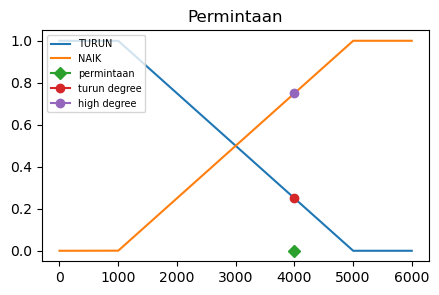

Permintaan Turun: 0.25
Permintaan Naik: 0.75


In [152]:
permintaan_turun_degree = fuzz.interp_membership(x_permintaan, permintaan_turun, permintaan)
permintaan_naik_degree = fuzz.interp_membership(x_permintaan, permintaan_naik, permintaan)

plt.title("Permintaan")
plt.plot(x_permintaan, permintaan_turun, label="TURUN", marker="")
plt.plot(x_permintaan, permintaan_naik, label="NAIK", marker="")
plt.plot(permintaan, 0.0, label="permintaan", marker="D")
plt.plot(permintaan, permintaan_turun_degree, label="turun degree", marker="o")
plt.plot(permintaan, permintaan_naik_degree, label="high degree", marker="o")
plt.legend(loc="upper left")
plt.show()

print("Permintaan Turun:", permintaan_turun_degree)
print("Permintaan Naik:", permintaan_naik_degree)

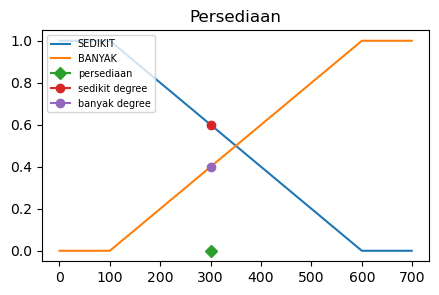

Persediaan Sedikit: 0.6
Persediaan Banyak: 0.4


In [153]:
persediaan_sedikit_degree = fuzz.interp_membership(x_persediaan, persediaan_sedikit, persediaan)
persediaan_banyak_degree = fuzz.interp_membership(x_persediaan, persediaan_banyak, persediaan)

plt.title("Persediaan")
plt.plot(x_persediaan, persediaan_sedikit, label="SEDIKIT", marker="")
plt.plot(x_persediaan, persediaan_banyak, label="BANYAK", marker="")
plt.plot(persediaan, 0.0, label="persediaan", marker="D")
plt.plot(persediaan, persediaan_sedikit_degree, label="sedikit degree", marker="o")
plt.plot(persediaan, persediaan_banyak_degree, label="banyak degree", marker="o")
plt.legend(loc="upper left")
plt.show()

print("Persediaan Sedikit:", persediaan_sedikit_degree)
print("Persediaan Banyak:", persediaan_banyak_degree)

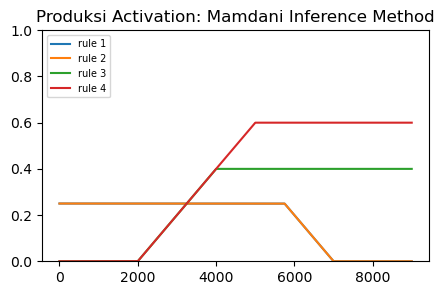

[0.25 0.25 0.25 ... 0.   0.   0.  ]
[0.25 0.25 0.25 ... 0.   0.   0.  ]
[0.  0.  0.  ... 0.4 0.4 0.4]
[0.  0.  0.  ... 0.6 0.6 0.6]


In [194]:
# ================ RULES ================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) permintaan_turun DAN persediaan_banyak <-> produksi_berkurang
# 2) permintaan_turun DAN persediaan_sedikit <-> produksi_berkurang
# 3) permintaan_naik DAN persediaan_banyak <-> produksi_bertambah
# 4) permintaan_naik DAN persediaan_sedikit <-> produksi_bertambah
# =======================================

activation_1 = np.fmin(min(permintaan_turun_degree, persediaan_banyak_degree), produksi_berkurang)
activation_2 = np.fmin(min(permintaan_turun_degree, persediaan_sedikit_degree), produksi_berkurang)
activation_3 = np.fmin(min(permintaan_naik_degree, persediaan_banyak_degree), produksi_bertambah)
activation_4 = np.fmin(min(permintaan_naik_degree, persediaan_sedikit_degree), produksi_bertambah)

plt.title("Produksi Activation: Mamdani Inference Method")
plt.plot(x_produksi, activation_1, label="rule 1", marker="")
plt.plot(x_produksi, activation_2, label="rule 2", marker="")
plt.plot(x_produksi, activation_3, label="rule 3", marker="")
plt.plot(x_produksi, activation_4, label="rule 4", marker="")
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.show()

print(activation_1)
print(activation_2)
print(activation_3)
print(activation_4)

In [199]:
# Apply the rules:
# * max for aggregation, like or the cases
aggregated = np.fmax(activation_1,
                     np.fmax(activation_2,
                             np.fmax(activation_3,
                                     activation_4)))

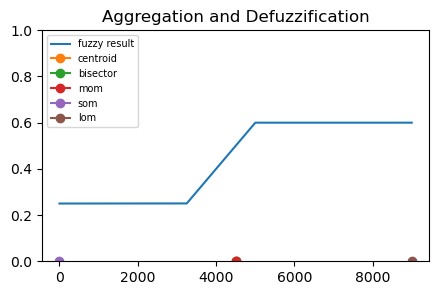

Produksi centroid: 5378
Produksi bisector: 5703
Produksi mom: 7000
Produksi som: 5000
Produksi lom: 8999


In [200]:
# Defuzzification
produksi_centroid = fuzz.defuzz(x_produksi, aggregated, 'centroid')
produksi_bisector = fuzz.defuzz(x_produksi, aggregated, 'bisector')
produksi_mom = fuzz.defuzz(x_produksi, aggregated, "mom")
produksi_som = fuzz.defuzz(x_produksi, aggregated, "som")
produksi_lom = fuzz.defuzz(x_produksi, aggregated, "lom")

plt.title("Aggregation and Defuzzification")
plt.plot(x_produksi, aggregated, label="fuzzy result", marker="")
plt.plot(tip_centroid, 0.0, label="centroid", marker="o")
plt.plot(tip_bisector, 0.0, label="bisector", marker="o")
plt.plot(tip_mom, 0.0, label="mom", marker="o")
plt.plot(tip_som, 0.0, label="som", marker="o")
plt.plot(tip_lom, 0.0, label="lom", marker="o")
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.show()

print("Produksi centroid:", round(produksi_centroid))
print("Produksi bisector:", round(produksi_bisector))
print("Produksi mom:", round(produksi_mom))
print("Produksi som:", round(produksi_som))
print("Produksi lom:", round(produksi_lom))

In [ ]:
## References:
## https://github.com/caigen/scikit-fuzzy-examples/blob/master/4-tipping-problem.py
## https://yuliana.lecturer.pens.ac.id/Kecerdasan%20Buatan/ppt/TEORI/Minggu11%20-%20Studi%20Kasus%20Logika%20Fuzzy.pdf